## PYSPARK
##### Python API para Apache Spark

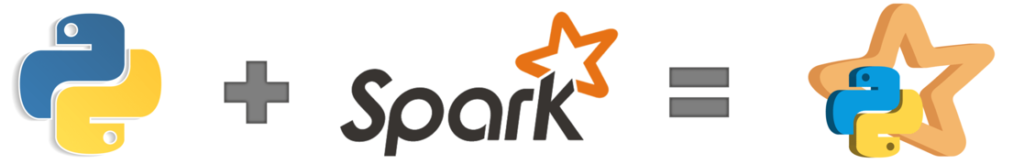

#Instalando o spark e o pyspark no nosso ambiente

In [1]:
%%sh
sudo pip install spark
sudo pip install pyspark

  Created wheel for spark: filename=spark-0.2.1-py3-none-any.whl size=58762 sha256=6073798a347c9d1cfab2db86620ce105b8db02c55720d258fa499c66118e0b7a
  Stored in directory: /root/.cache/pip/wheels/4e/0e/f1/164619f9920fb447d294afaae11a7715bd442ded7225953d72
Successfully built spark
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=9a11c7ebda76e365bc94b259b4de7c3fb11eb7923f9935bf6b18f75f79238bed
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


<h1> Importando as Bibliotecas </h1>

In [2]:
import pandas as pd

# Importando o spark e o pyspark
import spark,pyspark

# Importando as bibliotecas do pyspark.sql 
from pyspark.sql import *

# Importando as funções sql do spark
# Documentação: https://spark.apache.org/docs/latest/api/sql/index.html
from pyspark.sql import functions as f

# Importando os tipos de dados do spark
# Documentação: https://spark.apache.org/docs/latest/sql-ref-datatypes.html
from pyspark.sql import types as t 

# Biblioteca datetime
from datetime import datetime, date

<h3>Classes importantes de Spark SQL e DataFrames:</h3>
<ol>
  <li><b>pyspark.sql.SparkSession</b> -> Ponto principal de entrada para criar dataframes e funcionalidades do SQL.</li>
  <li><b>pyspark.sql.DataFrame</b> -> Coleção de dados distribuidas e agrupadas em colunas (tabela).</li>
  <li><b>pyspark.sql.Column</b> -> Coluna do dataframe</li>
  <li><b>pyspark.sql.Row</b> -> Linha do dataframe</li>
  <li><b>pyspark.sql.functions</b> -> Lista de funções embutidas para dataframes.</li>
  <li><b>pyspark.sql.types</b> -> Lista de tipos de dados para as colunas do dataframe.</li>

<ol>



In [3]:
# Criando uma Sessão do Spark (Spark Session)
spark = SparkSession.builder.master("local").appName("Aula Impacta Pyspark").getOrCreate()

In [10]:
# Importando objeto Row (linha)
from pyspark.sql import Row

# Criando um DataFrame no Spark
df = spark.createDataFrame([
    Row(a=1, b=2.0, c=['string1','string2'], d=date(2000, 1, 1), e=datetime(2000, 1, 1, 12, 0)),
    Row(a=2, b=3.0, c=['string1','string2'], d=date(2000, 2, 1), e=datetime(2000, 1, 2, 12, 0)),
    Row(a=4, b=5.0, c=['string1','string2'], d=date(2000, 3, 1), e=datetime(2000, 1, 3, 12, 0))
])

#df.show()
df.printSchema()

root
 |-- a: long (nullable = true)
 |-- b: double (nullable = true)
 |-- c: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- d: date (nullable = true)
 |-- e: timestamp (nullable = true)



In [9]:
# Outra de forma de criar um DataFrame
df = spark.createDataFrame([
                            Row(time="Palmeiras",cidade="São paulo"),
                            Row(time="Chapecoense",cidade="Chapecó"),
                            Row(time="Coritiba",cidade="Curitiba"),
])
df.show()

+-----------+---------+
|       time|   cidade|
+-----------+---------+
|  Palmeiras|São paulo|
|Chapecoense|  Chapecó|
|   Coritiba| Curitiba|
+-----------+---------+



In [6]:
# Criando um DataFrame com um schema fixo
df = spark.createDataFrame([
    (1, 2., 'string1', date(2000, 1, 1), datetime(2000, 1, 1, 12, 0)),
    (2, 3., 'string2', date(2000, 2, 1), datetime(2000, 1, 2, 12, 0)),
    (3, 4., 'string3', date(2000, 3, 1), datetime(2000, 1, 3, 12, 0))
], schema='a string, decimal double, d string, d date, e timestamp')
df.printSchema()

root
 |-- a: string (nullable = true)
 |-- decimal: double (nullable = true)
 |-- d: string (nullable = true)
 |-- d: date (nullable = true)
 |-- e: timestamp (nullable = true)



In [7]:
# Colunas
df.columns

['a', 'decimal', 'd', 'd', 'e']

In [11]:
# Pega N numero de linhas do DataFrame
df.limit(2).show()

+---+---+------------------+----------+-------------------+
|  a|  b|                 c|         d|                  e|
+---+---+------------------+----------+-------------------+
|  1|2.0|[string1, string2]|2000-01-01|2000-01-01 12:00:00|
|  2|3.0|[string1, string2]|2000-02-01|2000-01-02 12:00:00|
+---+---+------------------+----------+-------------------+



In [12]:
# Pega a primeira linha como row
df.take(1)

[Row(a=1, b=2.0, c=['string1', 'string2'], d=datetime.date(2000, 1, 1), e=datetime.datetime(2000, 1, 1, 12, 0))]

In [13]:
# Cria uma lista de rows (collect)
df.collect()

[Row(a=1, b=2.0, c=['string1', 'string2'], d=datetime.date(2000, 1, 1), e=datetime.datetime(2000, 1, 1, 12, 0)),
 Row(a=2, b=3.0, c=['string1', 'string2'], d=datetime.date(2000, 2, 1), e=datetime.datetime(2000, 1, 2, 12, 0)),
 Row(a=4, b=5.0, c=['string1', 'string2'], d=datetime.date(2000, 3, 1), e=datetime.datetime(2000, 1, 3, 12, 0))]

In [18]:
# Loop para pegar todas as Rows
for i in df.collect():
  print(i)

Row(a=1, b=2.0, c=['string1', 'string2'], d=datetime.date(2000, 1, 1), e=datetime.datetime(2000, 1, 1, 12, 0))
Row(a=2, b=3.0, c=['string1', 'string2'], d=datetime.date(2000, 2, 1), e=datetime.datetime(2000, 1, 2, 12, 0))
Row(a=4, b=5.0, c=['string1', 'string2'], d=datetime.date(2000, 3, 1), e=datetime.datetime(2000, 1, 3, 12, 0))


In [19]:
# Loop para pegar os valores das Rows
for i in df.collect():
  coluna_a = i['a']
  coluna_b = i['b']
  print(coluna_a,coluna_b)

1 2.0
2 3.0
4 5.0


In [20]:
# Convertendo o DataFrame do Spark para um DataFrame no Pandas
dfPandas = df.toPandas()
dfPandas.head()

,a,b,c,d,e
0,1,2.0,"[string1, string2]",2000-01-01,2000-01-01 12:00:00
1,2,3.0,"[string1, string2]",2000-02-01,2000-01-02 12:00:00
2,4,5.0,"[string1, string2]",2000-03-01,2000-01-03 12:00:00


In [25]:
# Convertendo o DataFrame do Pandas para o do Spark
df_pandas = pd.read_csv("/content/pedido.csv",delimiter=";")

df_spark = spark.createDataFrame(df_pandas)
print(type(df_pandas))
print(type(df_spark))

<class 'pandas.core.frame.DataFrame'>
<class 'pyspark.sql.dataframe.DataFrame'>


In [27]:
# Ler um csv, passando opções de delimitador e cabeçalho
df= spark.read.format("csv")\
.option("header","true")\
.option("delimiter",";")\
.load("/content/pedido.csv")
df.show()

# Outra forma de leitura:
# df= spark.read\
# .option("header","true")\
# .option("delimiter",";")\
# .csv("/content/pedido.csv")
# df

+---------+----------+----------+-------+
|id_pedido|id_cliente|      data|id_loja|
+---------+----------+----------+-------+
|        1|         1|2020-01-01|      1|
|        2|         2|2020-01-01|      2|
|        3|         3|2020-01-01|      3|
|        4|         4|2020-01-02|      1|
|        5|         5|2020-01-02|      2|
|        6|         6|2020-01-02|      3|
|        7|         7|2020-01-02|      1|
|        8|         8|2020-02-01|      2|
|        9|         9|2020-02-01|      3|
|       10|        10|2020-02-01|      1|
|       11|         1|2020-02-01|      2|
|       12|         2|2020-02-01|      3|
|       13|         3|2020-02-01|      1|
|       14|         4|2020-02-01|      2|
|       15|         5|2020-02-01|      3|
|       16|         6|2020-02-01|      1|
|       17|         7|2020-03-03|      2|
|       18|         8|2020-03-03|      3|
|       19|         9|2020-03-03|      1|
|       20|        10|2020-03-03|      2|
+---------+----------+----------+-

In [31]:
# Convertendo uma coluna
from pyspark.sql import types as DateType
from pyspark.sql import functions as f

df = df.withColumn("data_2",df.data.cast(t.DateType()))
df = df.withColumn("data_3",df['data'].cast("date"))
df = df.withColumn("data_4",f.col("data").cast("date"))

# Exemplos de outros casts
df = df.withColumn("data_5",f.col("data").cast("string"))
df = df.withColumn("data_5",f.col("data").cast("integer"))
df = df.withColumn("data_5",f.col("data").cast("decimal(20,2)"))

df.show()

+---------+----------+----------+-------+----------+----------+----------+------+
|id_pedido|id_cliente|      data|id_loja|    data_2|    data_3|    data_4|data_5|
+---------+----------+----------+-------+----------+----------+----------+------+
|        1|         1|2020-01-01|      1|2020-01-01|2020-01-01|2020-01-01|  null|
|        2|         2|2020-01-01|      2|2020-01-01|2020-01-01|2020-01-01|  null|
|        3|         3|2020-01-01|      3|2020-01-01|2020-01-01|2020-01-01|  null|
|        4|         4|2020-01-02|      1|2020-01-02|2020-01-02|2020-01-02|  null|
|        5|         5|2020-01-02|      2|2020-01-02|2020-01-02|2020-01-02|  null|
|        6|         6|2020-01-02|      3|2020-01-02|2020-01-02|2020-01-02|  null|
|        7|         7|2020-01-02|      1|2020-01-02|2020-01-02|2020-01-02|  null|
|        8|         8|2020-02-01|      2|2020-02-01|2020-02-01|2020-02-01|  null|
|        9|         9|2020-02-01|      3|2020-02-01|2020-02-01|2020-02-01|  null|
|       10|     

In [30]:
# Selecionando só algumas colunas
df_s = df.select("data_2","data_3")

df_s1 = df.select(df.data_2.alias("coluna3"),df.data_3)

df_s2 = df.select(df["data_2"],df["data_3"].alias("s"))

df_s3 = df.select(f.col("data_2").alias("data_4"),f.col("data_3"))
df_s3.show()

+----------+----------+
|    data_4|    data_3|
+----------+----------+
|2020-01-01|2020-01-01|
|2020-01-01|2020-01-01|
|2020-01-01|2020-01-01|
|2020-01-02|2020-01-02|
|2020-01-02|2020-01-02|
|2020-01-02|2020-01-02|
|2020-01-02|2020-01-02|
|2020-02-01|2020-02-01|
|2020-02-01|2020-02-01|
|2020-02-01|2020-02-01|
|2020-02-01|2020-02-01|
|2020-02-01|2020-02-01|
|2020-02-01|2020-02-01|
|2020-02-01|2020-02-01|
|2020-02-01|2020-02-01|
|2020-02-01|2020-02-01|
|2020-03-03|2020-03-03|
|2020-03-03|2020-03-03|
|2020-03-03|2020-03-03|
|2020-03-03|2020-03-03|
+----------+----------+
only showing top 20 rows



In [35]:
# Convertendo uma coluna
df = df.withColumn("data",df.data.cast(t.DateType()))

# Criando novas colunas
df = df.withColumn("Ano",f.year("data"))
df = df.withColumn("Mes",f.month("data"))
df = df.withColumn("Dia",f.dayofmonth("data"))


# Dropando colunas
df = df.drop("data_5")
df.show()

+---------+----------+----------+-------+----------+----------+----------+----+---+---+
|id_pedido|id_cliente|      data|id_loja|    data_2|    data_3|    data_4| Ano|Mes|Dia|
+---------+----------+----------+-------+----------+----------+----------+----+---+---+
|        1|         1|2020-01-01|      1|2020-01-01|2020-01-01|2020-01-01|2020|  1|  1|
|        2|         2|2020-01-01|      2|2020-01-01|2020-01-01|2020-01-01|2020|  1|  1|
|        3|         3|2020-01-01|      3|2020-01-01|2020-01-01|2020-01-01|2020|  1|  1|
|        4|         4|2020-01-02|      1|2020-01-02|2020-01-02|2020-01-02|2020|  1|  2|
|        5|         5|2020-01-02|      2|2020-01-02|2020-01-02|2020-01-02|2020|  1|  2|
|        6|         6|2020-01-02|      3|2020-01-02|2020-01-02|2020-01-02|2020|  1|  2|
|        7|         7|2020-01-02|      1|2020-01-02|2020-01-02|2020-01-02|2020|  1|  2|
|        8|         8|2020-02-01|      2|2020-02-01|2020-02-01|2020-02-01|2020|  2|  1|
|        9|         9|2020-02-01

In [37]:
# Ordenando exibição:

# Decrescente
df.orderBy(df.data,ascending=False).show()

# Crescente
df.orderBy(df.data,ascending=True).show()

+---------+----------+----------+-------+----------+----------+----------+----+---+---+
|id_pedido|id_cliente|      data|id_loja|    data_2|    data_3|    data_4| Ano|Mes|Dia|
+---------+----------+----------+-------+----------+----------+----------+----+---+---+
|       43|         3|2020-09-01|      1|2020-09-01|2020-09-01|2020-09-01|2020|  9|  1|
|       47|         7|2020-09-01|      2|2020-09-01|2020-09-01|2020-09-01|2020|  9|  1|
|       44|         4|2020-09-01|      2|2020-09-01|2020-09-01|2020-09-01|2020|  9|  1|
|       48|         8|2020-09-01|      3|2020-09-01|2020-09-01|2020-09-01|2020|  9|  1|
|       49|         9|2020-09-01|      3|2020-09-01|2020-09-01|2020-09-01|2020|  9|  1|
|       45|         5|2020-09-01|      3|2020-09-01|2020-09-01|2020-09-01|2020|  9|  1|
|       50|        10|2020-09-01|      3|2020-09-01|2020-09-01|2020-09-01|2020|  9|  1|
|       46|         6|2020-09-01|      1|2020-09-01|2020-09-01|2020-09-01|2020|  9|  1|
|       42|         2|2020-09-01

In [38]:
# Adicionando uma coluna literal
hoje = date.today()
usuario = "denilson"
df = df.withColumn("data_processamento",f.lit(hoje))
df = df.withColumn("usuario",f.lit(usuario))
df = df.withColumn("id_somado",df.id_pedido + df.id_cliente)
dfa = df.select("data","usuario","id_somado")
dfa.show()

+----------+--------+---------+
|      data| usuario|id_somado|
+----------+--------+---------+
|2020-01-01|denilson|      2.0|
|2020-01-01|denilson|      4.0|
|2020-01-01|denilson|      6.0|
|2020-01-02|denilson|      8.0|
|2020-01-02|denilson|     10.0|
|2020-01-02|denilson|     12.0|
|2020-01-02|denilson|     14.0|
|2020-02-01|denilson|     16.0|
|2020-02-01|denilson|     18.0|
|2020-02-01|denilson|     20.0|
|2020-02-01|denilson|     12.0|
|2020-02-01|denilson|     14.0|
|2020-02-01|denilson|     16.0|
|2020-02-01|denilson|     18.0|
|2020-02-01|denilson|     20.0|
|2020-02-01|denilson|     22.0|
|2020-03-03|denilson|     24.0|
|2020-03-03|denilson|     26.0|
|2020-03-03|denilson|     28.0|
|2020-03-03|denilson|     30.0|
+----------+--------+---------+
only showing top 20 rows



In [40]:
# Criando novas colunas
df = df.withColumn("Mes_decimal",f.col("Mes").cast("decimal(10,2)"))
df.show()

+---------+----------+----------+-------+----------+----------+----------+----+---+---+------------------+--------+---------+-----------+
|id_pedido|id_cliente|      data|id_loja|    data_2|    data_3|    data_4| Ano|Mes|Dia|data_processamento| usuario|id_somado|Mes_decimal|
+---------+----------+----------+-------+----------+----------+----------+----+---+---+------------------+--------+---------+-----------+
|        1|         1|2020-01-01|      1|2020-01-01|2020-01-01|2020-01-01|2020|  1|  1|        2022-05-13|denilson|      2.0|       1.00|
|        2|         2|2020-01-01|      2|2020-01-01|2020-01-01|2020-01-01|2020|  1|  1|        2022-05-13|denilson|      4.0|       1.00|
|        3|         3|2020-01-01|      3|2020-01-01|2020-01-01|2020-01-01|2020|  1|  1|        2022-05-13|denilson|      6.0|       1.00|
|        4|         4|2020-01-02|      1|2020-01-02|2020-01-02|2020-01-02|2020|  1|  2|        2022-05-13|denilson|      8.0|       1.00|
|        5|         5|2020-01-02| 

In [42]:
# Filtrando dados
df_loja1 = df.where(df.id_loja == 1)
df_loja1 = df.where(df['id_loja'] ==1)
df_loja1 = df.where(f.col("id_loja")==1)

# Filtrando dados tipo sql 
df_loja2 = df.filter("id_loja = 1 and mes =1 ")
df_loja1.show()
df_loja2.show()

+---------+----------+----------+-------+----------+----------+----------+----+---+---+------------------+--------+---------+-----------+
|id_pedido|id_cliente|      data|id_loja|    data_2|    data_3|    data_4| Ano|Mes|Dia|data_processamento| usuario|id_somado|Mes_decimal|
+---------+----------+----------+-------+----------+----------+----------+----+---+---+------------------+--------+---------+-----------+
|        1|         1|2020-01-01|      1|2020-01-01|2020-01-01|2020-01-01|2020|  1|  1|        2022-05-13|denilson|      2.0|       1.00|
|        4|         4|2020-01-02|      1|2020-01-02|2020-01-02|2020-01-02|2020|  1|  2|        2022-05-13|denilson|      8.0|       1.00|
|        7|         7|2020-01-02|      1|2020-01-02|2020-01-02|2020-01-02|2020|  1|  2|        2022-05-13|denilson|     14.0|       1.00|
|       10|        10|2020-02-01|      1|2020-02-01|2020-02-01|2020-02-01|2020|  2|  1|        2022-05-13|denilson|     20.0|       2.00|
|       13|         3|2020-02-01| 

In [44]:
# Lendo outro csv
df_cliente = spark.read.format("csv")\
.option("header","true")\
.option("delimiter",";")\
.option("encoding","latin1")\
.load("/content/clientes.csv")

df_cliente = df_cliente.withColumnRenamed("id_cliente", "id_cliente")
df_cliente.show()
#Preencher vazios
#df_cliente = df_cliente.na.fill("ss") 

+----------+--------------+-----+---------+-------+---------------+------------------+---------+-----------+
|id_cliente|          nome|   rg|      cpf|id_sexo|id_estado_civil|             email| telefone|id_endereco|
+----------+--------------+-----+---------+-------+---------------+------------------+---------+-----------+
|         1|  jose armando| 1211|343434343|      1|              1|      yh@email.com|2222-1111|          4|
|         2| carlo eduardo|   32|  4556454|      1|              1| yhsssss@email.com|2222-1112|          5|
|         3|    nina lopes|  232| 56645454|      2|              1|  eeeeeh@email.com|2222-1113|          6|
|         4|   juan arturo|23444|  7756454|      1|              1|eeeeddyh@email.com|2222-1115|          7|
|         5|micheal marley| 4454|  4546575|      1|              2|  ddddyh@email.com|2222-1111|          8|
|         6|        jhonny| 6565|  3434343|      1|              2|              ssss|2122-1111|          9|
|         7| carlo 

In [45]:
# Join entre dois dataframes
df_join = df.join(df_cliente,["id_cliente"],how='left') #inner,left,right,full

# Outra forma de fazer joins:
df_join = df.join(df_cliente,(df.id_cliente==df_cliente.id_cliente),how='left').drop(df_cliente.id_cliente)
df_join.show()

+---------+----------+----------+-------+----------+----------+----------+----+---+---+------------------+--------+---------+-----------+--------------+-----+---------+-------+---------------+------------------+---------+-----------+
|id_pedido|id_cliente|      data|id_loja|    data_2|    data_3|    data_4| Ano|Mes|Dia|data_processamento| usuario|id_somado|Mes_decimal|          nome|   rg|      cpf|id_sexo|id_estado_civil|             email| telefone|id_endereco|
+---------+----------+----------+-------+----------+----------+----------+----+---+---+------------------+--------+---------+-----------+--------------+-----+---------+-------+---------------+------------------+---------+-----------+
|        1|         1|2020-01-01|      1|2020-01-01|2020-01-01|2020-01-01|2020|  1|  1|        2022-05-13|denilson|      2.0|       1.00|  jose armando| 1211|343434343|      1|              1|      yh@email.com|2222-1111|          4|
|        2|         2|2020-01-01|      2|2020-01-01|2020-01-01|2

In [46]:
# Filtrando os dados com o Where com AND
df_join1 = df_join.where( (df_join.data=="2020-01-01") & (df_join.id_somado> 2) )

# Filtrando os dados com o Where com OR
df_join1 = df_join.where( (df_join.data=="2020-01-01") | (df_join.id_somado> 2) )


In [47]:
df_join2 = df_join.where( (df_join.Mes=="1"))
df_join3 = df_join.filter(" Dia =2 ")

In [48]:
# Gravando dados como parquet #overwrite REESCREVE E #append junta
df_join1.write.mode("overwrite").parquet("/content/loja_park/pedido_cliente1")


In [58]:
# Gravando dados como parquet #overwrite REESCREVE E #append junta
df_join1.write.mode("append").parquet("/content/loja_park/pedido_cliente1")


In [54]:
# Partition by irá criar uma arvore de pastas
df_join1.write.partitionBy("Ano","Mes","Dia").parquet("/content/loja_park/pedido_cliente1_partition")

In [59]:
# Lendo parquet
df_p = spark.read.parquet("/content/loja_park/pedido_cliente1/")
df_p.show()

+---------+----------+----------+-------+----------+----------+----------+----+---+---+------------------+--------+---------+-----------+--------------+-----+---------+-------+---------------+------------------+---------+-----------+
|id_pedido|id_cliente|      data|id_loja|    data_2|    data_3|    data_4| Ano|Mes|Dia|data_processamento| usuario|id_somado|Mes_decimal|          nome|   rg|      cpf|id_sexo|id_estado_civil|             email| telefone|id_endereco|
+---------+----------+----------+-------+----------+----------+----------+----+---+---+------------------+--------+---------+-----------+--------------+-----+---------+-------+---------------+------------------+---------+-----------+
|        1|         1|2020-01-01|      1|2020-01-01|2020-01-01|2020-01-01|2020|  1|  1|        2022-05-13|denilson|      2.0|       1.00|  jose armando| 1211|343434343|      1|              1|      yh@email.com|2222-1111|          4|
|        2|         2|2020-01-01|      2|2020-01-01|2020-01-01|2

In [60]:
# Lendo Parquet do pedido do cliente1 e filtrando o mes e dia
df_p = spark.read.parquet("/content/loja_park/\
pedido_cliente1_partition/Ano=2020/Mes=2/Dia=1")
df_p.show()

+---------+----------+----------+-------+----------+----------+----------+------------------+--------+---------+-----------+--------------+-----+---------+-------+---------------+------------------+---------+-----------+
|id_pedido|id_cliente|      data|id_loja|    data_2|    data_3|    data_4|data_processamento| usuario|id_somado|Mes_decimal|          nome|   rg|      cpf|id_sexo|id_estado_civil|             email| telefone|id_endereco|
+---------+----------+----------+-------+----------+----------+----------+------------------+--------+---------+-----------+--------------+-----+---------+-------+---------------+------------------+---------+-----------+
|        8|         8|2020-02-01|      2|2020-02-01|2020-02-01|2020-02-01|        2022-05-13|denilson|     16.0|       2.00|      ian alan|55775|675645353|      1|              2|      yh@email.com|1122-1111|         11|
|        9|         9|2020-02-01|      3|2020-02-01|2020-02-01|2020-02-01|        2022-05-13|denilson|     18.0|    

In [61]:
# Contagem de dados
df_p.count()

9

In [62]:
# Cria uma tabela temporaria do sql
df_p.registerTempTable("parquezin")
df_cliente.registerTempTable("cliente")

df_query = spark.sql("select id_pedido,cliente.id_cliente\
 from parquezin \
 inner join cliente on parquezin.id_cliente=cliente.id_cliente\
 where parquezin.id_cliente >=8 ")
df_query.show()

/usr/local/lib/python3.7/dist-packages/pyspark/sql/dataframe.py:140: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  FutureWarning


+---------+----------+
|id_pedido|id_cliente|
+---------+----------+
|        8|         8|
|        9|         9|
|       10|        10|
+---------+----------+



In [63]:
# Agrupando dados
df_p = df.groupBy("data")\
.agg(f.count("*").alias("qtd"),
     f.sum("id_somado").alias("soma"),
     f.max("id_somado").alias("max"),
     f.min("id_somado").alias("min"),
     f.collect_list("id_somado").alias("lista"))
df_p.show()

+----------+---+-----+----+----+--------------------+
|      data|qtd| soma| max| min|               lista|
+----------+---+-----+----+----+--------------------+
|2020-03-03|  8|208.0|30.0|22.0|[24.0, 26.0, 28.0...|
|2020-09-01|  9|468.0|60.0|44.0|[44.0, 46.0, 48.0...|
|2020-02-01|  9|156.0|22.0|12.0|[16.0, 18.0, 20.0...|
|2020-08-01|  7|312.0|50.0|40.0|[40.0, 42.0, 44.0...|
|2020-04-04| 10|350.0|40.0|30.0|[30.0, 32.0, 34.0...|
|2020-01-02|  4| 44.0|14.0| 8.0|[8.0, 10.0, 12.0,...|
|2020-01-01|  3| 12.0| 6.0| 2.0|     [2.0, 4.0, 6.0]|
+----------+---+-----+----+----+--------------------+

